# Diabetes Prediction

This generic problem was discovered on the Internet. I cannot remember the source, but it was at a point where I would search for any Machine Learning problems and attempt to solve. In this example, the objective was to predict whether individuals have diabetes based on various features. The final output will have the actual value and prediction.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection

Here is where the dataset is identified and loaded into a dataframe.

In [4]:
dataset=r'C:\Users\claudius.ibine\Desktop\diabetes.csv'
dataset=pd.read_csv(dataset,index_col=None)
dataset=dataset[['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','diabetes']]

Here is where I summarize the dataset.

In [5]:
def aggregate():
    print('The number of rows by columns:  {0}'.format(dataset.shape))
    print("\n"+'The first 10 records are:')
    print(dataset.head(10))
    print("\n"+'The dataset datatypes are:')
    print(dataset.dtypes)

In [6]:
aggregate()

The number of rows by columns:  (768, 9)

The first 10 records are:
   num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   
5         5           116            74          0        0  25.6      0.201   
6         3            78            50         32       88  31.0      0.248   
7        10           115             0          0        0  35.3      0.134   
8         2           197            70         45      543  30.5      0.158   
9         8           125            96          0        0   0.0      0.232   

   age  diabetes  
0   50      True  
1   31     Fa

Here is where I clean the dataset.

In [7]:
def clean():
    print(dataset.isnull().sum()) #check nulll values
    print(dataset.describe()) #check for low values in min

In [8]:
clean()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64
         num_preg  glucose_conc  diastolic_bp   thickness     insulin  \
count  768.000000    768.000000    768.000000  768.000000  768.000000   
mean     3.845052    120.894531     69.105469   20.536458   79.799479   
std      3.369578     31.972618     19.355807   15.952218  115.244002   
min      0.000000      0.000000      0.000000    0.000000    0.000000   
25%      1.000000     99.000000     62.000000    0.000000    0.000000   
50%      3.000000    117.000000     72.000000   23.000000   30.500000   
75%      6.000000    140.250000     80.000000   32.000000  127.250000   
max     17.000000    199.000000    122.000000   99.000000  846.000000   

              bmi   diab_pred         age  
count  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885  
std      7.884160    0.331329   11.

In [9]:
dataset['num_preg']=dataset['num_preg'].replace(0,dataset['num_preg'].mean())
dataset['glucose_conc']=dataset['glucose_conc'].replace(0,dataset['glucose_conc'].mean())
dataset['diastolic_bp']=dataset['diastolic_bp'].replace(0,dataset['diastolic_bp'].mean())
dataset['thickness']=dataset['thickness'].replace(0,dataset['thickness'].mean())
dataset['insulin']=dataset['insulin'].replace(0,dataset['insulin'].mean())
dataset['bmi']=dataset['bmi'].replace(0,dataset['bmi'].mean())

In [10]:
print(dataset.head(11))

     num_preg  glucose_conc  diastolic_bp  thickness     insulin        bmi  \
0    6.000000         148.0     72.000000  35.000000   79.799479  33.600000   
1    1.000000          85.0     66.000000  29.000000   79.799479  26.600000   
2    8.000000         183.0     64.000000  20.536458   79.799479  23.300000   
3    1.000000          89.0     66.000000  23.000000   94.000000  28.100000   
4    3.845052         137.0     40.000000  35.000000  168.000000  43.100000   
5    5.000000         116.0     74.000000  20.536458   79.799479  25.600000   
6    3.000000          78.0     50.000000  32.000000   88.000000  31.000000   
7   10.000000         115.0     69.105469  20.536458   79.799479  35.300000   
8    2.000000         197.0     70.000000  45.000000  543.000000  30.500000   
9    8.000000         125.0     96.000000  20.536458   79.799479  31.992578   
10   4.000000         110.0     92.000000  20.536458   79.799479  37.600000   

    diab_pred  age  diabetes  
0       0.627   50  





Here I will convert the string values to numericals for the machine learning model.


In [11]:
def preprocess_dataset(df):
    processed_df=df.copy()
    le=preprocessing.LabelEncoder()
    processed_df.diabetes=le.fit_transform(processed_df.diabetes)
    return processed_df
dataset=preprocess_dataset(dataset)

In [12]:
print(dataset.head(11))

     num_preg  glucose_conc  diastolic_bp  thickness     insulin        bmi  \
0    6.000000         148.0     72.000000  35.000000   79.799479  33.600000   
1    1.000000          85.0     66.000000  29.000000   79.799479  26.600000   
2    8.000000         183.0     64.000000  20.536458   79.799479  23.300000   
3    1.000000          89.0     66.000000  23.000000   94.000000  28.100000   
4    3.845052         137.0     40.000000  35.000000  168.000000  43.100000   
5    5.000000         116.0     74.000000  20.536458   79.799479  25.600000   
6    3.000000          78.0     50.000000  32.000000   88.000000  31.000000   
7   10.000000         115.0     69.105469  20.536458   79.799479  35.300000   
8    2.000000         197.0     70.000000  45.000000  543.000000  30.500000   
9    8.000000         125.0     96.000000  20.536458   79.799479  31.992578   
10   4.000000         110.0     92.000000  20.536458   79.799479  37.600000   

    diab_pred  age  diabetes  
0       0.627   50  

Here I will identify the feature and target column and split the dataset into training and testing

In [13]:
feature=['glucose_conc','diastolic_bp','thickness','insulin','bmi','age']
target='diabetes'
x=dataset[feature]
y=dataset[target]
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

Here I will determine the best model for this problem using the below function.

In [14]:
def algorithms():
    models=[]
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    results=[]
    names=[]
    scoring='accuracy'
    for name, model in models:
        kfold=model_selection.KFold(n_splits=10,random_state=seed)
        cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
        print(msg)

    fig=plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return

LR: 0.766969 (0.050278)
LDA: 0.765636 (0.050625)
KNN: 0.717396 (0.066985)
CART: 0.694036 (0.049872)
NB: 0.749983 (0.033451)
SVM: 0.651025 (0.072141)


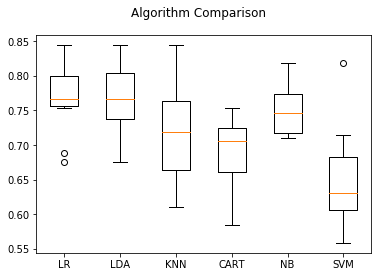

In [15]:
algorithms()

Here I will fit the machine learning model.

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_prediction=lr.predict(x_test)

Now, the prediction process begins.

In [17]:
features=x_test.reset_index()
features=features[['glucose_conc','diastolic_bp','thickness','insulin','bmi','age']]
actual=(list(y_test))
prediction=(list(lr_prediction))
features['actual']=pd.Series(actual)
features['prediction']=pd.Series(prediction)
output=features

In [18]:
print(actual)

[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [19]:
print(prediction)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
final=features[['actual','prediction']]

In [21]:
print(final)

     actual  prediction
0         0           0
1         0           0
2         0           0
3         0           0
4         1           0
5         1           0
6         1           1
7         1           0
8         1           1
9         0           0
10        0           0
11        0           0
12        1           0
13        0           0
14        0           0
15        1           0
16        1           1
17        1           1
18        0           0
19        0           0
20        0           0
21        0           1
22        0           0
23        1           1
24        1           0
25        0           0
26        0           0
27        1           0
28        1           0
29        1           0
..      ...         ...
278       1           1
279       1           1
280       0           0
281       0           0
282       0           0
283       0           0
284       0           0
285       0           1
286       1           1
287       0     

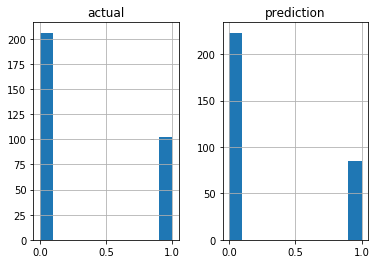

In [23]:
final.hist()
plt.show()